No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


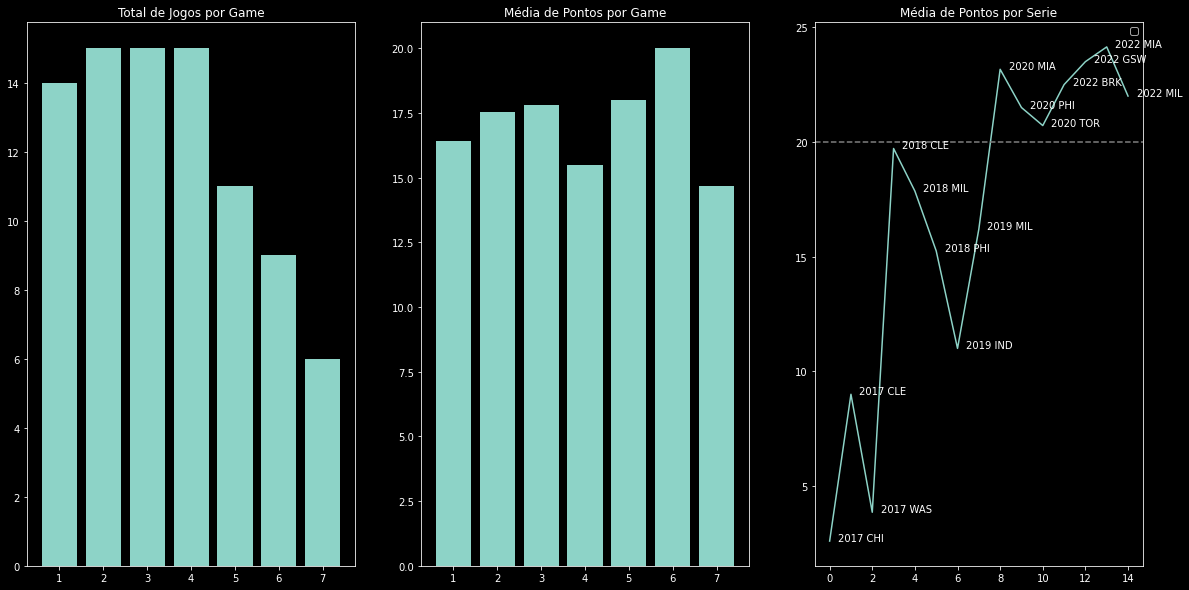

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = 'https://www.basketball-reference.com/players/b/brownja02/gamelog-playoffs/'
csv = pd.read_html(url)
stats = csv[-1]
pd.set_option('display.max_rows', 500)

#Iremos agrupar média da % de FG por ano
#df_MIN = df_MIN.groupby(by=[df_MIN.index.month,df_MIN.index.day]).agg({'Data_Value':np.amin}).reset_index()
#print(df_MIN)
#Limpando/Preparando Coluna de Data futuro index

stats = stats.dropna(subset=['2017 Playoffs'])
Trash = stats[stats['2017 Playoffs'].str.contains('Playoffs')]

stats = stats.drop(index=Trash.index)
stats = stats.drop(labels=[])
stats['2017 Playoffs'] = pd.to_datetime(stats['2017 Playoffs'])
stats.set_index('2017 Playoffs',inplace=True)


#Agrupando
#Limpando coluna de pontos, deixando apenas numeros
stats = stats[stats['PTS'].str.contains('[\d]+',regex=True)]
stats['PTS'] = stats['PTS'].astype('float')
#print(stats['PTS'])

#Insight: Podemos agrupar por jogo
#Agrupamento por Ano
stats_max = stats.groupby(by=[stats.index.year]).agg({'PTS':np.max})
stats_min = stats.groupby(by=[stats.index.year]).agg({'PTS':np.min})
stats_average = stats.groupby(by=[stats.index.year]).agg({'PTS':np.average})


#plot por jogo
stats_game = stats.groupby(by='G#').agg({'PTS':np.average})
stats_game_count = stats.groupby(by='G#').count()

#Para cada serie
stats_jogo = stats.groupby(by=[stats.index.year,'Opp']).agg({'PTS':np.average})
stats_jogo = stats_jogo.reset_index()
list = []
for i in range(len(stats_jogo)):
        nome = '{ano} {time}'.format(ano=stats_jogo.iloc[i,0],time=stats_jogo.iloc[i,1])
        list.append(nome)

#GRAFICO
from matplotlib import style
style.use('dark_background')
figure, ax = plt.subplots(1, 3)

ax[0].bar(range(1,len(stats_game_count)+ 1),height=stats_game_count['PTS'],label='1')
ax[0].set_title(label='Total de Jogos por Game')

ax[1].bar(range(1,len(stats_game)+1),height=stats_game['PTS'],linestyle='solid')
ax[1].set_title(label='Média de Pontos por Game')

ax[2].plot(range(len(stats_jogo['PTS'])),stats_jogo['PTS'])
ax[2].set_title(label='Média de Pontos por Serie')

ax[2].scatter(range(len(stats_jogo)),np.array(stats_jogo['PTS']),c='black')
ax[2].axhline(y=20,c='grey',linestyle='--')
for i, txt in enumerate(list):
    ax[2].annotate(txt,(i+0.4,stats_jogo.iloc[i,2]))
#Botar linha do tempo.
figure.set_size_inches(20,10)
plt.legend()
plt.savefig('JaylenB.png')
plt.show()
